# Imports

In [1]:
from PIL import Image
from matplotlib import image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2, fftfreq
import imageio
from scipy.signal import convolve2d

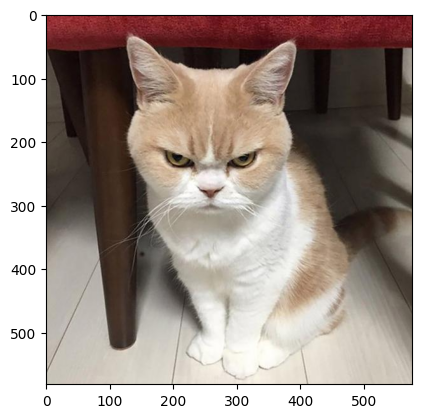

In [2]:
image_source = mpimg.imread("Data/cat.jpg")
plt.imshow(image_source)
plt.show()

# Practical functions

In [115]:
def produce_shifts(F):
    l_shift = np.roll(F,-1,1) #i,j+1
    l_shift[:,-1]=F[:,-1]

    r_shift = np.roll(F,+1,1) #i,j-1
    r_shift[:,0]=F[:,0]

    u_shift = np.roll(F,-1,0) #i-1,j
    u_shift[-1,:]=F[-1,:]

    d_shift = np.roll(F,1,0) #i+1,j
    d_shift[0,:]=F[0,:]
    
    return l_shift, r_shift, u_shift, d_shift

In [193]:
def gaussian_2d(x, mean=0, std=1):
    return 1/(2*np.pi*std**2)*np.exp(-0.5*np.linalg.norm((x-mean)/std)**2)

In [117]:
def clean(image):
    image=image.real
    image=np.int64(image)
    image[image<0]=0
    image[image>255]=255
    return image

# No Presmoothing

In [118]:
F=np.copy(image_source)

In [119]:
#Parameters
h=1

#Making shifted matrices. Setting the "removed values" to what they were before.
l_shift, r_shift, u_shift, d_shift = produce_shifts(F)

#Calculate Laplacian
F_L = 1/h**2 * (d_shift+u_shift+r_shift+l_shift-4*F) 

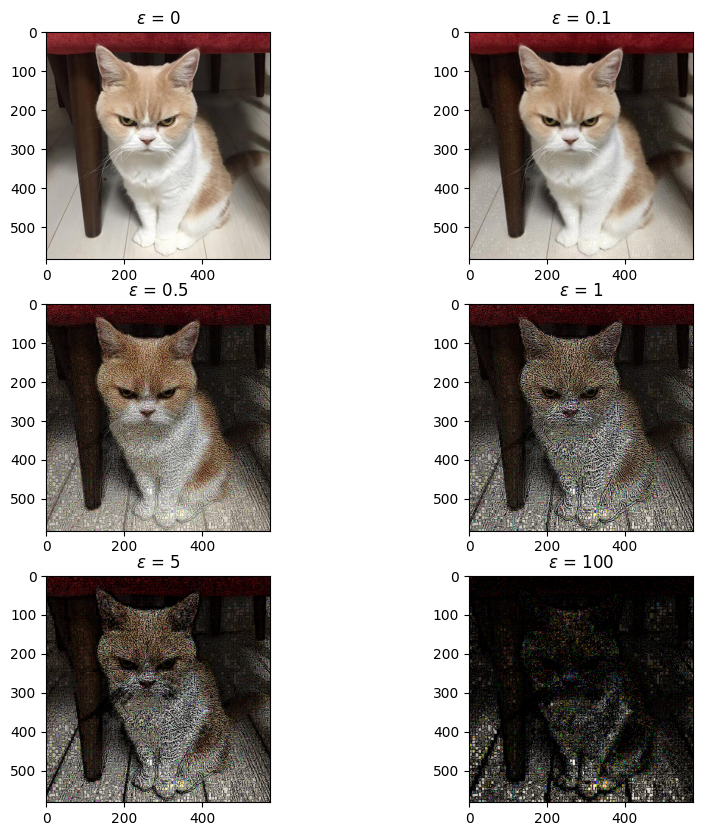

In [120]:
fig,axs= plt.subplots(3,2, figsize=(10,10))

eps = [[0,0.1],
       [0.5,1],
       [5,100]]

for i in range(3):
    for j in range(2):
        F_new = F-eps[i][j]*F_L
        F_new = clean(F_new)
        
        axs[i,j].imshow(F_new)
        axs[i,j].set_title(f"$\epsilon$ = {eps[i][j]}")
    
plt.show()

# Gaussian Presmoothing

In [104]:
color1 = F[:,:,0]
color2 = F[:,:,1]
color3 = F[:,:,2]

## One Color

### Making Gaussian

In [212]:
a = 2

row_vals = np.linspace(-a,a,21)
col_vals = np.linspace(-a,a,21)

grid = np.array(np.meshgrid(col_vals,row_vals))

gaussian = np.apply_along_axis(gaussian_2d, 0, grid)

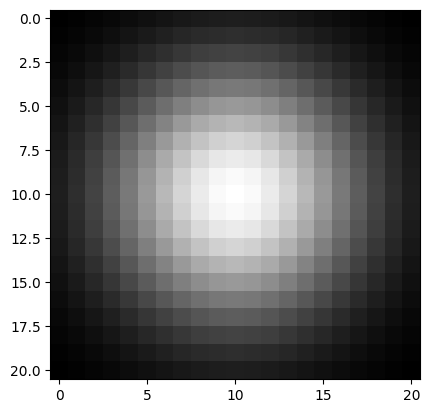

In [213]:
plt.imshow(gaussian, cmap="gray")
plt.show()

### Doing Convolution

In [214]:
%%time
F_smoothed = convolve2d(color1,gaussian, mode="same")

CPU times: total: 156 ms
Wall time: 373 ms


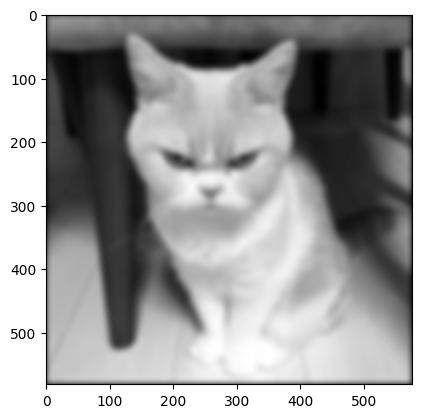

In [215]:
plt.imshow(F_smoothed, cmap="gray")
plt.show()

### Doing sharpening and plotting

In [216]:
#Parameters
h=1

#Making shifted matrices. Setting the "removed values" to what they were before.
l_shift_s, r_shift_s, u_shift_s, d_shift_s = produce_shifts(F_smoothed)

#Calculate Laplacian
F_L_smoothed = 1/h**2 * (d_shift_s+u_shift_s+r_shift_s+l_shift_s-4*F_smoothed) 

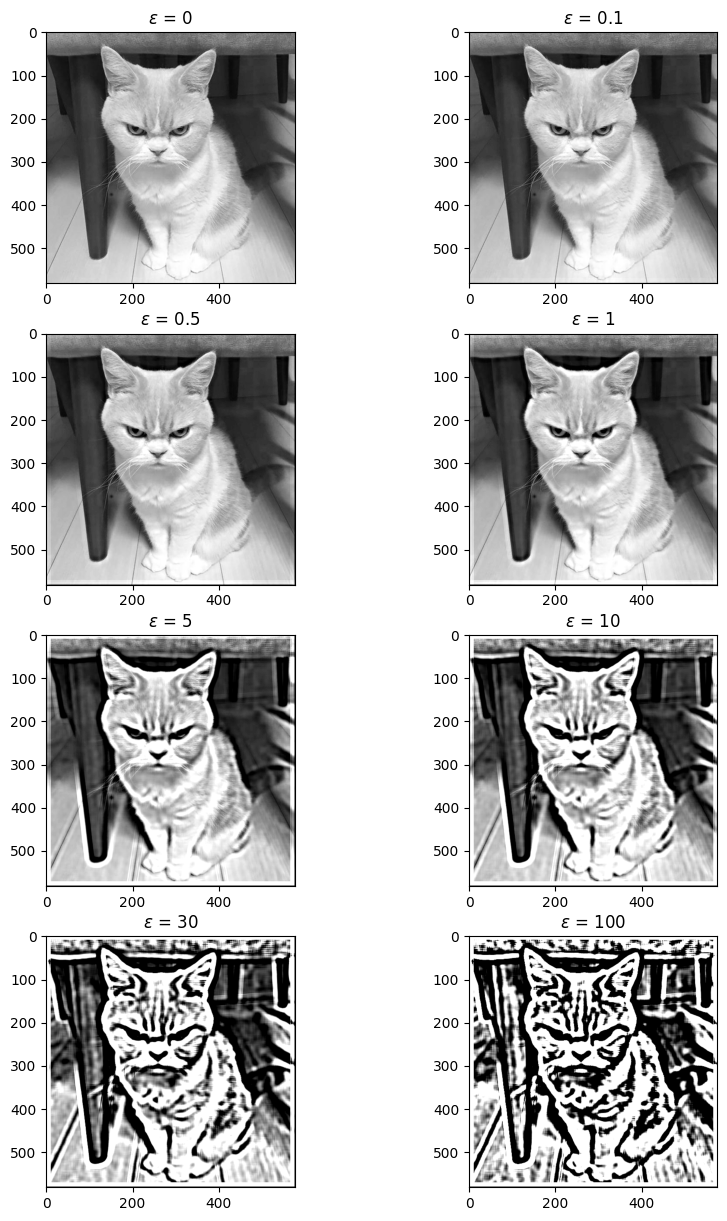

In [217]:
fig,axs= plt.subplots(4,2, figsize=(10,15))

eps = [[0,0.1],
       [0.5,1],
       [5,10],
       [30,100]]

for i in range(4):
    for j in range(2):
        F_new = color1-eps[i][j]*F_L_smoothed
        F_new = clean(F_new)
        
        axs[i,j].imshow(F_new, cmap="gray")
        axs[i,j].set_title(f"$\epsilon$ = {eps[i][j]}")
    
plt.show()

## All Colors

In [218]:
%%time
color1_smoothed = convolve2d(color1,gaussian, mode="same")
color2_smoothed = convolve2d(color2,gaussian, mode="same")
color3_smoothed = convolve2d(color3,gaussian, mode="same")

CPU times: total: 641 ms
Wall time: 1.12 s


In [219]:
F_smoothed = np.array([color1_smoothed,color2_smoothed,color3_smoothed])
F_smoothed = np.moveaxis(F_smoothed, 0, -1)

In [220]:
#Parameters
h=1

#Making shifted matrices. Setting the "removed values" to what they were before.
l_shift_s, r_shift_s, u_shift_s, d_shift_s = produce_shifts(F_smoothed)

#Calculate Laplacian
F_L_smoothed = 1/h**2 * (d_shift_s+u_shift_s+r_shift_s+l_shift_s-4*F_smoothed) 

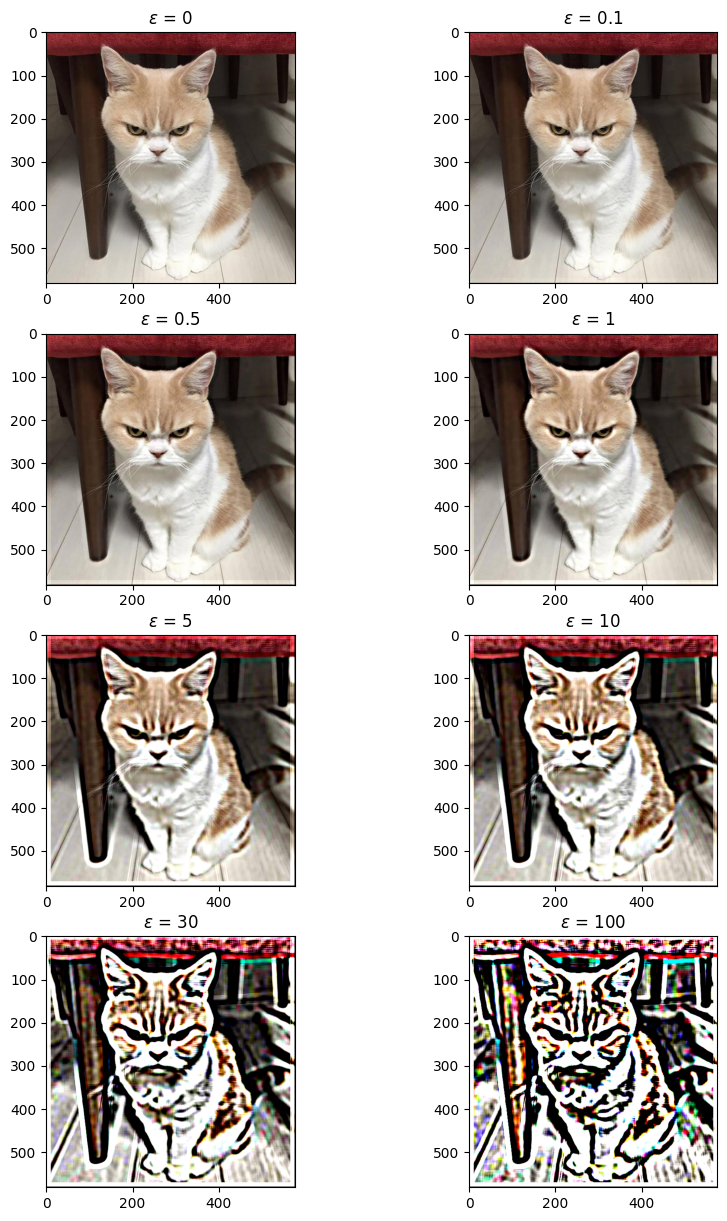

In [221]:
fig,axs= plt.subplots(4,2, figsize=(10,15))

eps = [[0,0.1],
       [0.5,1],
       [5,10],
       [30,100]]

for i in range(4):
    for j in range(2):
        F_new = F-eps[i][j]*F_L_smoothed
        F_new = clean(F_new)
        
        axs[i,j].imshow(F_new)
        axs[i,j].set_title(f"$\epsilon$ = {eps[i][j]}")
    
plt.show()

# THE END

# Old Stuff

## Try 4

### Making Gaussian

In [144]:
a = 100
row_vals = np.linspace(-a,a,np.shape(F)[0])
col_vals = np.linspace(-a,a,np.shape(F)[1])

grid = np.array(np.meshgrid(col_vals,row_vals))

gaussian = np.apply_along_axis(gaussian_2d, 0, grid)

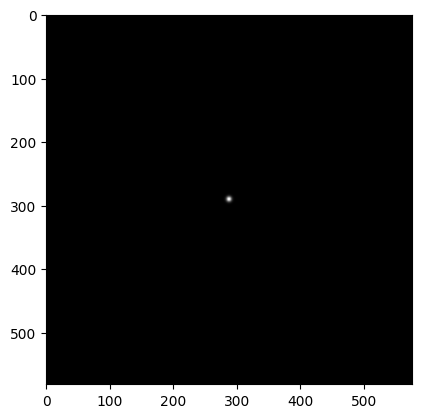

In [145]:
plt.imshow(gaussian, cmap="gray")
plt.show()

### Doing Convolution

In [146]:
%%time
F_smoothed = convolve2d(color1,gaussian, mode="same")

CPU times: total: 3min 21s
Wall time: 4min 10s


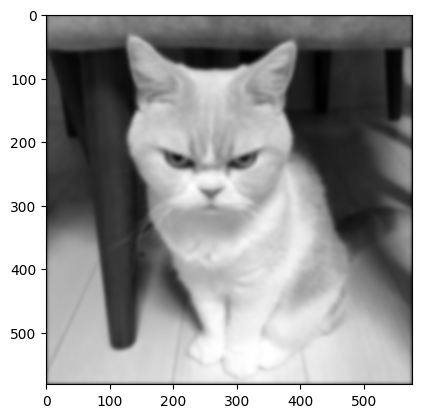

In [147]:
plt.imshow(F_smoothed, cmap="gray")
plt.show()

### Doing sharpening and plotting

In [148]:
#Parameters
h=1

#Making shifted matrices. Setting the "removed values" to what they were before.
l_shift_s, r_shift_s, u_shift_s, d_shift_s = produce_shifts(F_smoothed)

#Calculate Laplacian
F_L_smoothed = 1/h**2 * (d_shift_s+u_shift_s+r_shift_s+l_shift_s-4*F_smoothed) 

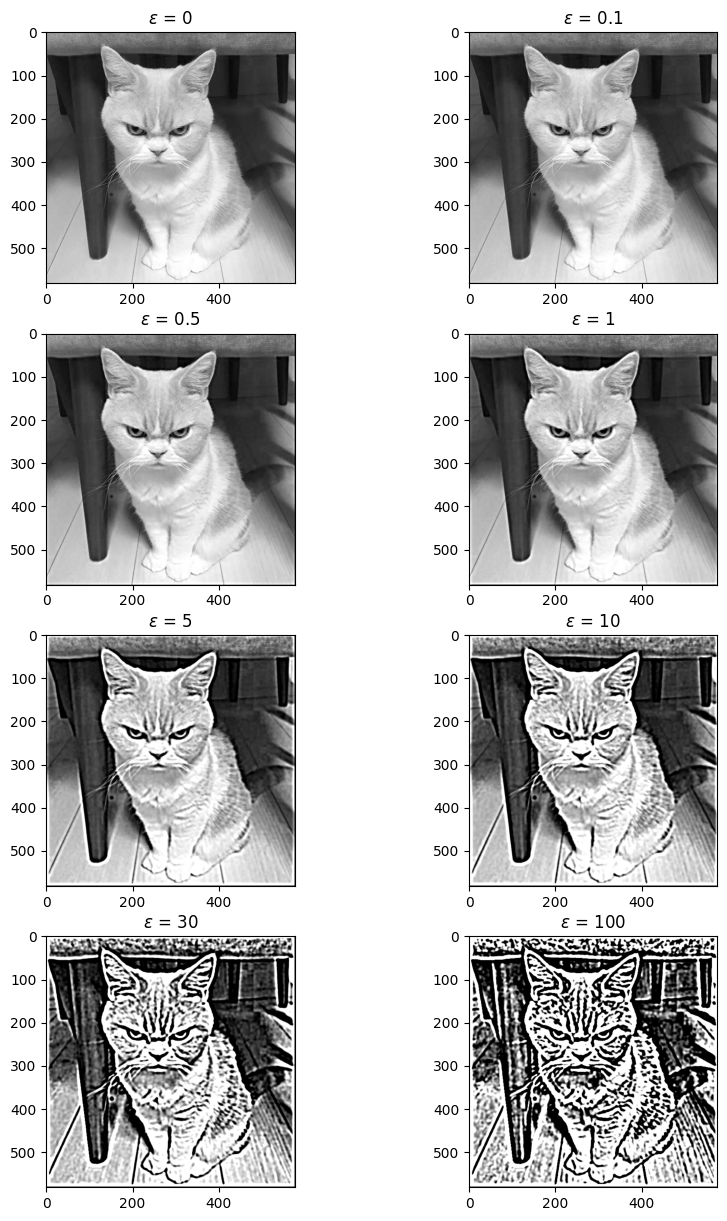

In [153]:
fig,axs= plt.subplots(4,2, figsize=(10,15))

eps = [[0,0.1],
       [0.5,1],
       [5,10],
       [30,100]]

for i in range(4):
    for j in range(2):
        F_new = color1-eps[i][j]*F_L_smoothed
        F_new = clean(F_new)
        
        axs[i,j].imshow(F_new, cmap="gray")
        axs[i,j].set_title(f"$\epsilon$ = {eps[i][j]}")
    
plt.show()

## Try 4 All Colors

In [154]:
%%time
color1_smoothed = convolve2d(color1,gaussian, mode="same")
color2_smoothed = convolve2d(color2,gaussian, mode="same")
color3_smoothed = convolve2d(color3,gaussian, mode="same")

CPU times: total: 9min 43s
Wall time: 12min 33s


In [163]:
F_smoothed = np.array([color1_smoothed,color2_smoothed,color3_smoothed])
F_smoothed = np.moveaxis(F_smoothed, 0, -1)

In [164]:
#Parameters
h=1

#Making shifted matrices. Setting the "removed values" to what they were before.
l_shift_s, r_shift_s, u_shift_s, d_shift_s = produce_shifts(F_smoothed)

#Calculate Laplacian
F_L_smoothed = 1/h**2 * (d_shift_s+u_shift_s+r_shift_s+l_shift_s-4*F_smoothed) 

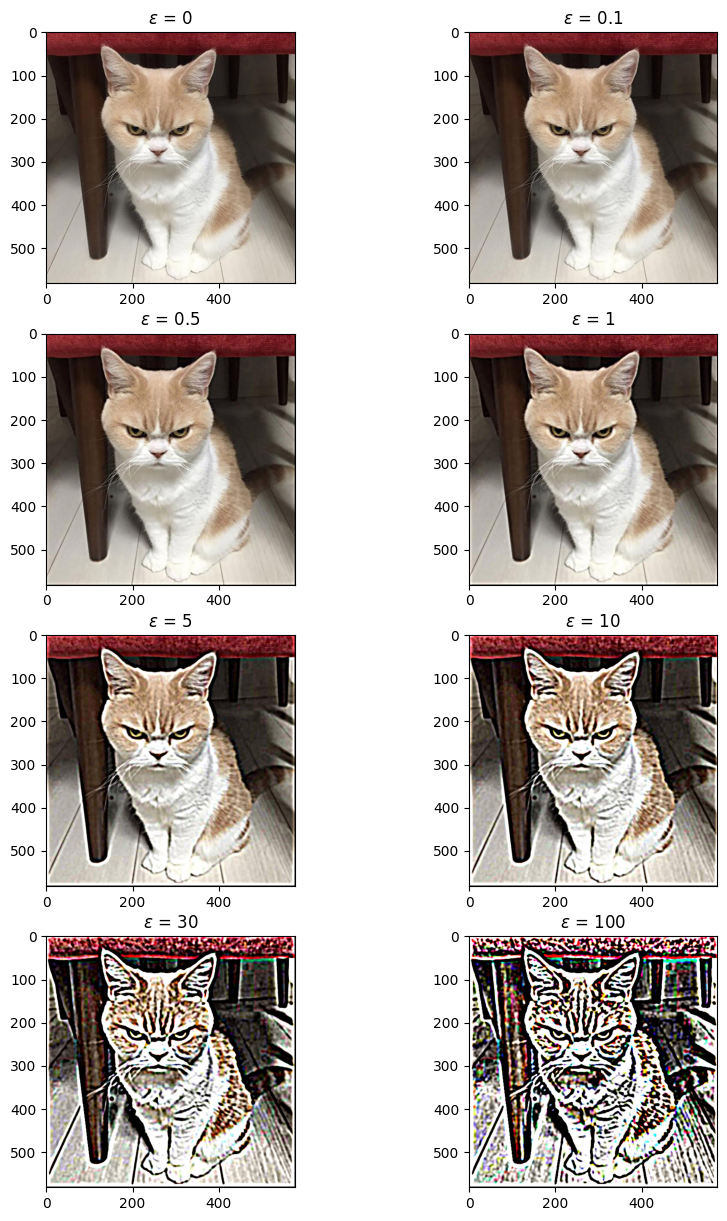

In [165]:
fig,axs= plt.subplots(4,2, figsize=(10,15))

eps = [[0,0.1],
       [0.5,1],
       [5,10],
       [30,100]]

for i in range(4):
    for j in range(2):
        F_new = F-eps[i][j]*F_L_smoothed
        F_new = clean(F_new)
        
        axs[i,j].imshow(F_new)
        axs[i,j].set_title(f"$\epsilon$ = {eps[i][j]}")
    
plt.show()

## Try 1

### Making Gaussian

In [108]:
a = 2
row_vals = np.linspace(-a,a,np.shape(F)[0])
col_vals = np.linspace(-a,a,np.shape(F)[1])

grid = np.array(np.meshgrid(col_vals,row_vals))

gaussian = np.apply_along_axis(gaussian_2d, 0, grid)

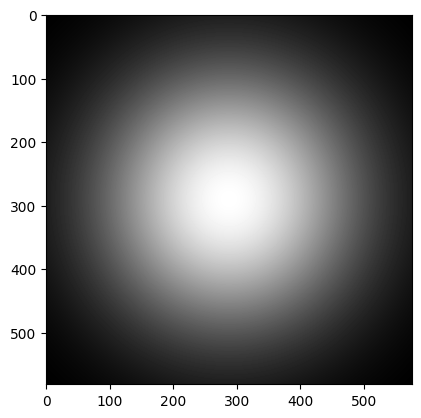

In [109]:
plt.imshow(gaussian, cmap="gray")
plt.show()

### Doing Convolution

In [111]:
%%time
F_smoothed = convolve2d(color1,gaussian, mode="same")

CPU times: total: 0 ns
Wall time: 0 ns


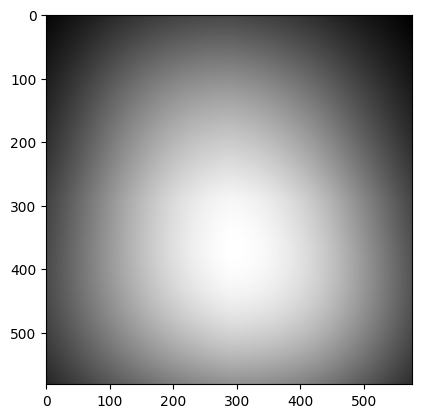

In [114]:
plt.imshow(F_smoothed, cmap="gray")
plt.show()

### Doing sharpening and plotting

In [121]:
#Parameters
h=1

#Making shifted matrices. Setting the "removed values" to what they were before.
l_shift_s, r_shift_s, u_shift_s, d_shift_s = produce_shifts(F_smoothed)

#Calculate Laplacian
F_L_smoothed = 1/h**2 * (d_shift_s+u_shift_s+r_shift_s+l_shift_s-4*F_smoothed) 

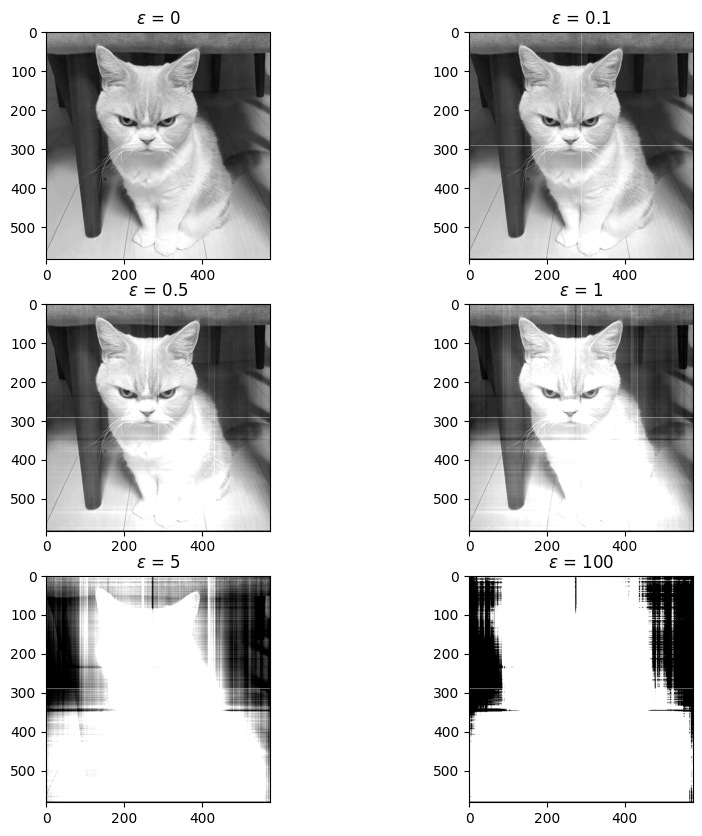

In [124]:
fig,axs= plt.subplots(3,2, figsize=(10,10))

eps = [[0,0.1],
       [0.5,1],
       [5,100]]

for i in range(3):
    for j in range(2):
        F_new = color1-eps[i][j]*F_L_smoothed
        F_new = clean(F_new)
        
        axs[i,j].imshow(F_new, cmap="gray")
        axs[i,j].set_title(f"$\epsilon$ = {eps[i][j]}")
    
plt.show()

## Try 2

### Making Gaussian

In [125]:
a = 10
row_vals = np.linspace(-a,a,np.shape(F)[0])
col_vals = np.linspace(-a,a,np.shape(F)[1])

grid = np.array(np.meshgrid(col_vals,row_vals))

gaussian = np.apply_along_axis(gaussian_2d, 0, grid)

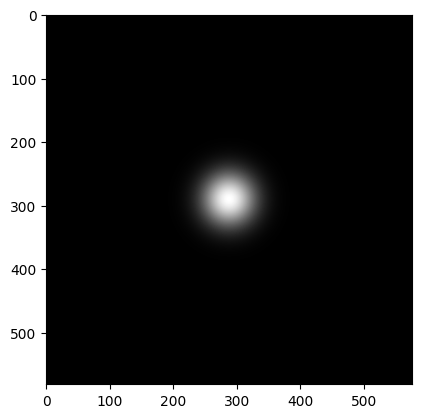

In [126]:
plt.imshow(gaussian, cmap="gray")
plt.show()

### Doing Convolution

In [127]:
%%time
F_smoothed = convolve2d(color1,gaussian, mode="same")

CPU times: total: 3min 8s
Wall time: 4min 2s


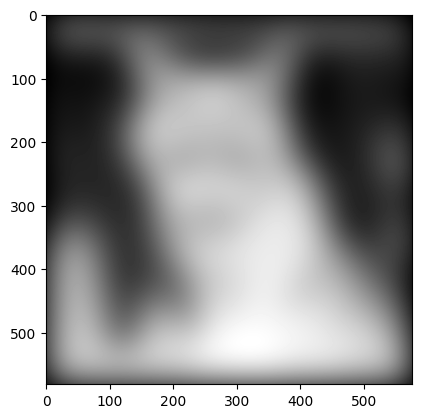

In [128]:
plt.imshow(F_smoothed, cmap="gray")
plt.show()

### Doing sharpening and plotting

In [129]:
#Parameters
h=1

#Making shifted matrices. Setting the "removed values" to what they were before.
l_shift_s, r_shift_s, u_shift_s, d_shift_s = produce_shifts(F_smoothed)

#Calculate Laplacian
F_L_smoothed = 1/h**2 * (d_shift_s+u_shift_s+r_shift_s+l_shift_s-4*F_smoothed) 

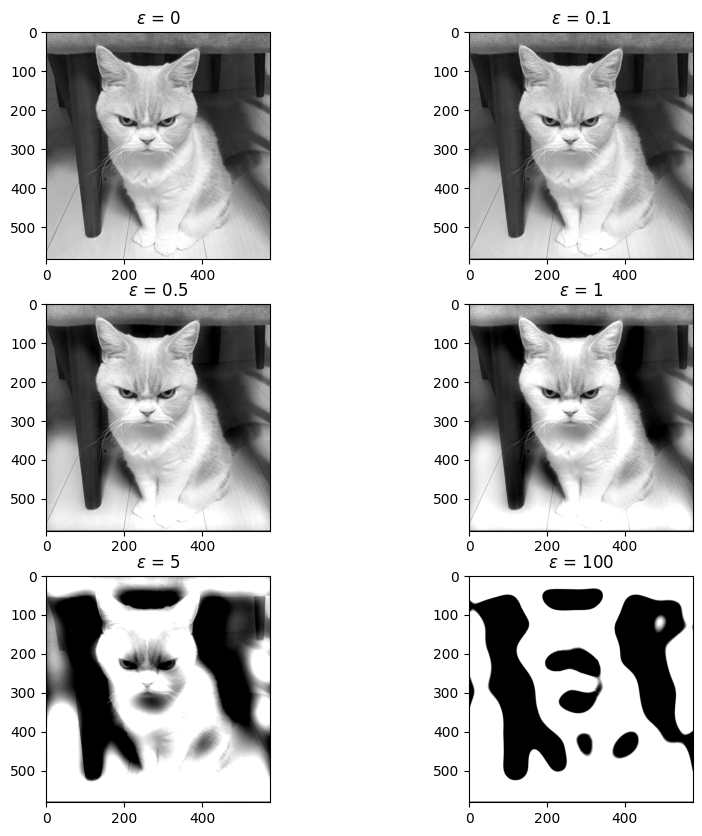

In [132]:
fig,axs= plt.subplots(3,2, figsize=(10,10))

eps = [[0,0.1],
       [0.5,1],
       [5,100]]

for i in range(3):
    for j in range(2):
        F_new = color1-eps[i][j]*F_L_smoothed
        F_new = clean(F_new)
        
        axs[i,j].imshow(F_new, cmap="gray")
        axs[i,j].set_title(f"$\epsilon$ = {eps[i][j]}")
    
plt.show()

## Try 3

### Making Gaussian

In [133]:
a = 20
row_vals = np.linspace(-a,a,np.shape(F)[0])
col_vals = np.linspace(-a,a,np.shape(F)[1])

grid = np.array(np.meshgrid(col_vals,row_vals))

gaussian = np.apply_along_axis(gaussian_2d, 0, grid)

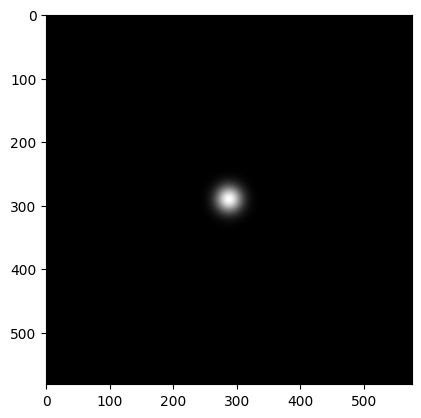

In [134]:
plt.imshow(gaussian, cmap="gray")
plt.show()

### Doing Convolution

In [135]:
%%time
F_smoothed = convolve2d(color1,gaussian, mode="same")

CPU times: total: 2min 49s
Wall time: 4min 7s


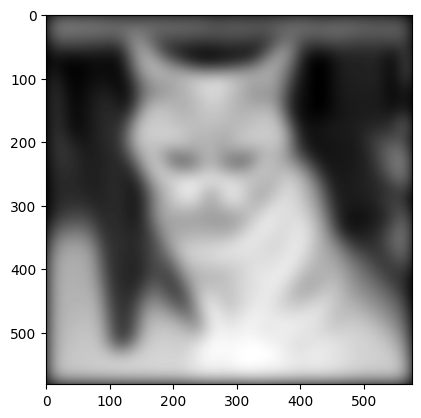

In [136]:
plt.imshow(F_smoothed, cmap="gray")
plt.show()

### Doing sharpening and plotting

In [137]:
#Parameters
h=1

#Making shifted matrices. Setting the "removed values" to what they were before.
l_shift_s, r_shift_s, u_shift_s, d_shift_s = produce_shifts(F_smoothed)

#Calculate Laplacian
F_L_smoothed = 1/h**2 * (d_shift_s+u_shift_s+r_shift_s+l_shift_s-4*F_smoothed) 

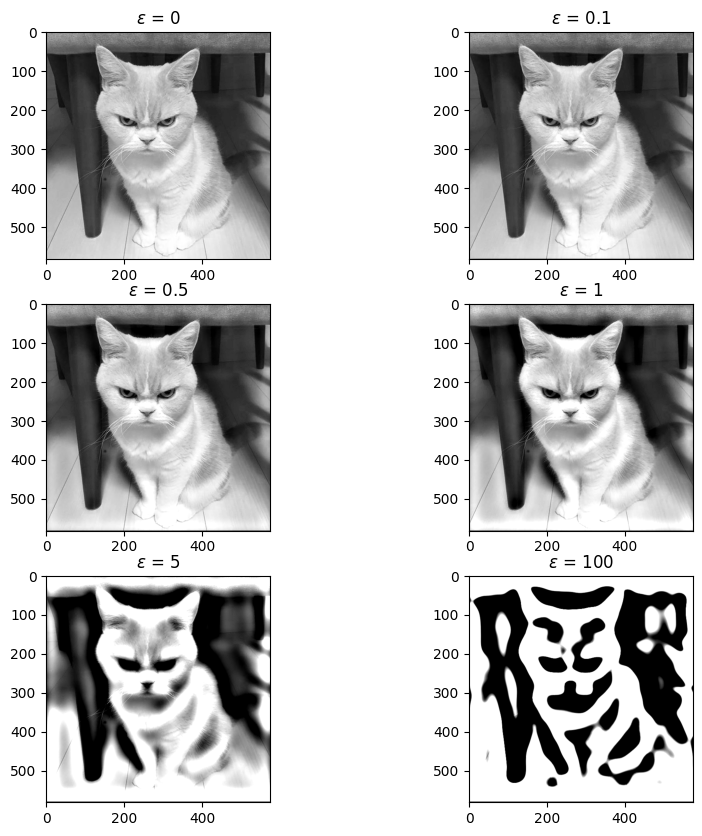

In [138]:
fig,axs= plt.subplots(3,2, figsize=(10,10))

eps = [[0,0.1],
       [0.5,1],
       [5,100]]

for i in range(3):
    for j in range(2):
        F_new = color1-eps[i][j]*F_L_smoothed
        F_new = clean(F_new)
        
        axs[i,j].imshow(F_new, cmap="gray")
        axs[i,j].set_title(f"$\epsilon$ = {eps[i][j]}")
    
plt.show()